# pre-processing

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron

In [50]:
df = pd.read_csv("Breast_GSE45827.csv")

In [51]:
df.dropna()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,luminal_B,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,233,luminal_B,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,236,luminal_B,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,237,luminal_B,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


In [52]:
df.type.isnull().sum()

0

In [53]:
DF_RM_DUP = df.drop_duplicates()

In [54]:
dft=df.drop(columns = ['samples'])

In [55]:
dft.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947


In [56]:
ord_enc = OrdinalEncoder()
dft["type"] = ord_enc.fit_transform(dft[["type"]])

In [57]:
X=dft.drop(columns = ['type'])

In [58]:
y=dft['type']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=324)

## Decision tree

In [12]:
max_depth = range(2,100,2) 
testing_accuracy = []
training_accuracy = []
DTaccuracy = 0

In [13]:
for i in max_depth: 
    dt = DecisionTreeClassifier(max_depth=i, random_state=342)
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred)) 
    y_predict_test = dt.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score) 
    if DTaccuracy < acc_score: 
        DTaccuracy = acc_score 
        best_depth = i

In [14]:
 DTaccuracy= DTaccuracy*100

In [15]:
print("accuracy for best depth:" , DTaccuracy)

accuracy for best depth: 84.0


In [16]:
print(best_depth)

2


## K-nearest neighbors

In [18]:
k = range(1,100,2) 
testing_accuracy = []
training_accuracy = []
KNNaccuracy = 0 

In [19]:
for i in k: 
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train) 
    y_predict_train = knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train)) 
    y_predict_test = knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score) 
    if KNNaccuracy < acc_score: 
        KNNaccuracy = acc_score 
        best_k = i

In [20]:
KNNaccuracy= KNNaccuracy*100

In [21]:
print("accuracy for best k:" , KNNaccuracy)

accuracy for best k: 90.0


In [22]:
print(best_k)

7


# Perceptron  

## Multi-Layer Perceptron (MLP)

In [43]:
scaler = StandardScaler() 

In [44]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [45]:
mlp = MLPClassifier(
       max_iter=1000,
       alpha=0.1,
       activation='logistic',
       solver='adam',
       random_state=42
      )

In [46]:
mlp.fit(X_train_scaler, y_train)
mlp_predict = mlp.predict(X_test_scaler)

In [47]:
MLPaccuracy = accuracy_score(y_test, mlp_predict)*100

In [48]:
print('MLP Accuracy: ' , MLPaccuracy)

MLP Accuracy:  86.0


## Single-layer Perceptron

In [29]:
x = df.drop(['type'],axis=1)
y = df.type
class_breast = LabelEncoder()
y = class_breast.fit_transform(df.type.values)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.33)

In [31]:
type_classifier = Perceptron(max_iter=40, eta0=0.1, random_state=0)
type_classifier.fit(X_train,y_train.ravel())

Perceptron(eta0=0.1, max_iter=40)

In [32]:
y_predicted =type_classifier.predict(X_test)

In [33]:
type(type_classifier)

sklearn.linear_model._perceptron.Perceptron

In [34]:
y_predicted[:10]

array([2, 1, 2, 2, 4, 1, 2, 0, 0, 5])

In [35]:
Perceptron_accuracy= accuracy_score(y_test,y_predicted)*100

In [36]:
print(Perceptron_accuracy)

92.0


## Visualization

[(0.0, 100.0)]

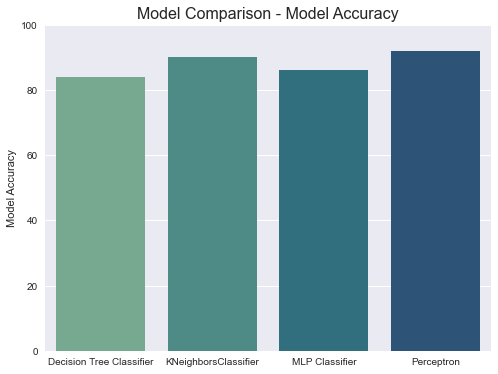

In [60]:
plt.style.use("seaborn")

x = ["Decision Tree Classifier",  
     "KNeighborsClassifier","MLP Classifier", "Perceptron"]

y = [DTaccuracy, 
     KNNaccuracy,
     MLPaccuracy,
     Perceptron_accuracy]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=16, fontname="arial", y=1);
ax.set(ylim=(0, 100))